# Fruits-113 CNN

This is the flagship model that trains over the entire Fruits-360 dataset.

# 1. Import all the stuff

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv

# 2. Prepare the Fruit-360 dataset
We will connect to HuggingFace to load the Fruits-360 dataset directly into this session.

In [ ]:
# install package for HuggingFace
!pip install datasets

In [6]:
# Load the fruits-360 dataset
from datasets import load_dataset
dataset = load_dataset("PedroSampaio/fruits-360")

# note: there is also an option to stream it instead of loading the whole dataset at once

In [7]:
# Let's take a look at what we got!
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 67690
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 22688
    })
})

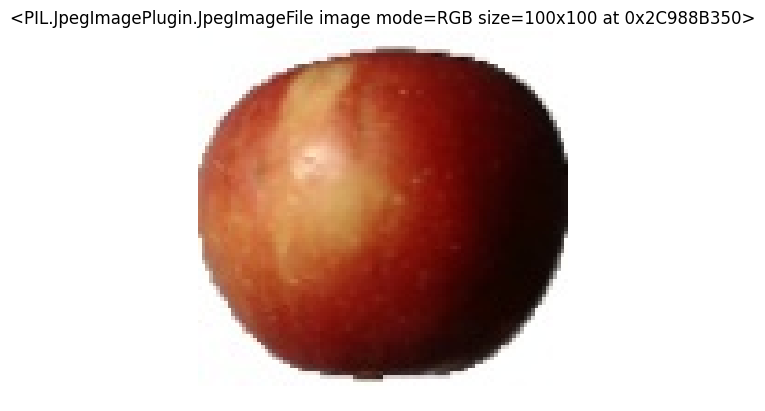

In [8]:
# This is one image from our train data
one_sample_image = dataset['train']['image'][0]
plt.title(one_sample_image)
plt.imshow(one_sample_image)
plt.axis('off')
plt.show()

In [9]:
# These are all the possible values for the labels in the train data (one for each of the 113 classes)
np.unique(dataset['train']['label'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112])

In [10]:
# Finally, we split the train data into training set and validation set
from datasets import Dataset
from sklearn.model_selection import train_test_split

train_data = dataset['train']

train_features, val_features, train_labels, val_labels = train_test_split(train_data['image'], train_data['label'], test_size=0.2, random_state=42)

training_set = Dataset.from_dict({'image': train_features, 'label': train_labels}).to_tf_dataset(
    columns="image",
    label_cols="label",
    batch_size=32,
    shuffle=True,
)

validation_set = Dataset.from_dict({'image': val_features, 'label': val_labels}).to_tf_dataset(
    columns="image",
    label_cols="label",
    batch_size=32,
    shuffle=True,
)

# 3. Training Montage
Now we train our model!

In [11]:
cnn = tf.keras.models.Sequential()

# Convolutional layer with Batch Normalizationa
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=9, activation='relu', input_shape=[100, 100, 3]))
cnn.add(tf.keras.layers.BatchNormalization())

# MaxPooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=9))

# Convolutional layer with Batch Normalization
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())

# Flatten layer
cnn.add(tf.keras.layers.Flatten())

# Fully connected (Dense) layer with Batch Normalization and Dropout
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

# Output layer
cnn.add(tf.keras.layers.Dense(units=113, activation='softmax'))

In [12]:
cnn.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 128)       31232     
                                                                 
 batch_normalization (Batch  (None, 92, 92, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 batch_normalization_1 (Bat  (None, 8, 8, 64)          256       
 chNormalization)                                                
                                                        

In [13]:
cnn.fit(x=training_set, validation_data=validation_set, epochs=4, verbose=1)

Epoch 1/4
1693/1693 [==============================] - 557s 329ms/step - loss: 0.2915 - accuracy: 0.9352 - val_loss: 0.0501 - val_accuracy: 0.9850
Epoch 2/4
1693/1693 [==============================] - 628s 371ms/step - loss: 0.0361 - accuracy: 0.9907 - val_loss: 0.0307 - val_accuracy: 0.9920
Epoch 3/4
1693/1693 [==============================] - 707s 417ms/step - loss: 0.0268 - accuracy: 0.9928 - val_loss: 0.0168 - val_accuracy: 0.9941
Epoch 4/4
1693/1693 [==============================] - 683s 403ms/step - loss: 0.0164 - accuracy: 0.9958 - val_loss: 0.0285 - val_accuracy: 0.9913


# 4. Save the Model
So we can load this model in other notebooks without having to train it again.

In [18]:
# cnn.save("./models/fruits-113.keras")

If on GOOGLE COLLAB, run this cell to download the model to your local machine.

In [15]:
# !zip -r fruits-113-keras.zip ./fruits-113-keras
# from google.colab import files

# files.download('fruits-113-keras.zip')

# 5. Testing the Model
Cross your fingers!

### 5a. Test on one single image (external-capable: not from Fruits-360)
Questionable if accurate.

(**remember to upload the image** if you're on Google Collab! Click on the folder icon on the left and drag the image in from local)

1/1 [==============================] - 0s 78ms/step


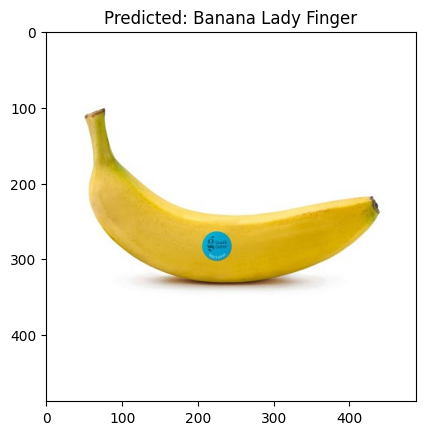

In [16]:
# Path to your single image
test_image_path = 'res/banana.jpg' # <<<<<<< CHANGE THIS <<<<<<<

# The labels we get from the dataset are just numbers [0,113] so this array here is to map it to a fruit name.
class_names=['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red', 'Apple Red Delicious', 'Apple Red Yellow', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana',
 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit',
 'Cantaloupe', 'Carambula', 'Cauliflower', 'Cherry', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red',
 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk',
 'Cucumber Ripe', 'Dates', 'Eggplant', 'Fig', 'Ginger Root',
 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grapefruit Pink', 'Grapefruit White',
 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats',
 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red',
 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine',
 'Nectarine Flat', 'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion Red Peeled',
 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach',
 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser',
 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams', 'Pepino',
 'Pepper Green', 'Pepper Orange', 'Pepper Red', 'Pepper Yellow', 'Physalis',
 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Pomegranate', 'Pomelo Sweetie', 'Potato Red',
 'Potato Red Washed', 'Potato Sweet', 'Potato White', 'Quince', 'Rambutan',
 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge',
 'Tamarillo', 'Tangelo', 'Tomato',
 'Tomato Cherry Red', 'Tomato Heart', 'Tomato Maroon', 'Tomato Yellow',
 'Tomato not Ripened', 'Walnut', 'Watermelon']

def preprocess_image(img):
  # Resize the image to match model input size
  img = tf.image.resize(img, [100, 100])
  # Add batch dimension
  img = tf.expand_dims(img, axis=0)
  return img

def get_image(file_path):
  # Load raw from file
  img = tf.io.read_file(file_path)
  # Convert to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  return preprocess_image(img)

# Preprocess the image
test_image = get_image(test_image_path)

# Make predictions
predictions = cnn.predict(test_image)

# Get the top prediction
predicted_class = np.argmax(predictions)

# Display the single image with the predicted label
plt.imshow(cv.cvtColor(cv.imread(test_image_path), cv.COLOR_BGR2RGB))
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()

### 5b. Test on the test data from Fruits-360
Expect high accuracies with these.

1/1 [==============================] - 0s 9ms/step


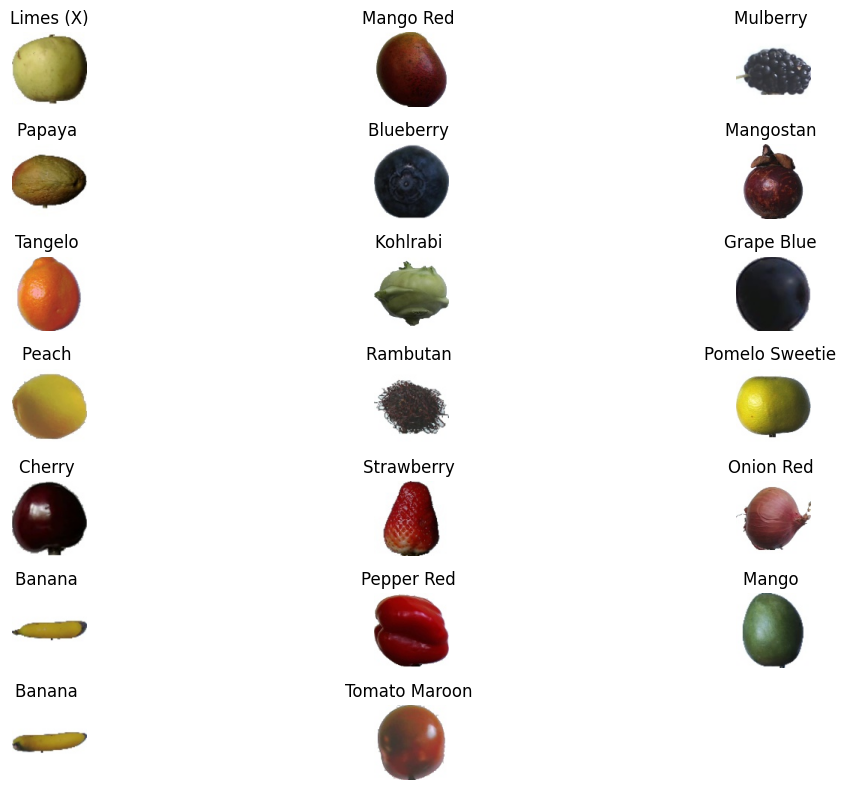

'Overall accuracy on testing set: 95.0%'

In [17]:
training_count = 20  # <<<<<<< CHANGE THIS <<<<<<<

testing_set = np.array(dataset['test'])     # get test data from the Fruits-360 dataset we loaded from HF earlier
np.random.shuffle(testing_set)              # shuffle them
testing_set = testing_set[:training_count]  # slice and get a subset of images


# Display the results
num_rows = int(np.ceil(len(testing_set) / 3))
corrects = 0
plt.figure(figsize=(12, 8))
for index, test_element in enumerate(testing_set):
  # Run image through model
  img = preprocess_image(np.array(test_element["image"]))
  predictions = cnn.predict(img)
  predicted_class = np.argmax(predictions)

  # Check if correct
  if predicted_class == test_element['label']:
    correct = ""
    corrects += 1
  else:
    correct = "(X)"

  # "Dynamic" subplots
  plt.subplot(num_rows, 3, index + 1)
  plt.imshow(test_element['image'])
  plt.title(f"{class_names[predicted_class]} {correct}")
  plt.axis('off')

plt.tight_layout()
plt.show()


# Print overall accuracy on testing set
f"Overall accuracy on testing set: {corrects / training_count * 100}%"